<a href="https://colab.research.google.com/github/HuiningLiu02/TIF360-Advanced-machine-learning-with-neural-networks/blob/main/Ch03_CNN/ec03_C_deepdream/deepdream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating DeepDreams

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch03_CNN/ec03_C_deepdream/deepdream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to copy the "neuraltissue_with_colorlabels.png" file from the
<a href="https://github.com/DeepTrackAI/DeepLearningCrashCourse/tree/main/Ch03_CNN/ec03_C_deepdream">notebook folder</a> in GitHub to the Colab/Kaggle work directory.
</div>

This notebook provides you with a complete code example that loads an image and the VGG16 pre-trained neural network, and uses them to create DeepDreams.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-C from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading an Image

Load the example image titled `neuraltissue_with_colorlabels.png`.

This image is sourced from the Drosophila ssTEM dataset, which is publicly available on Figshare: [Segmented anisotropic ssTEM dataset of neural tissue](https://figshare.com/articles/dataset/Segmented_anisotropic_ssTEM_dataset_of_neural_tissue/856713). This dataset provides a detailed view of neural tissue, aiding in the study of neural structures and patterns. The image can also be downloaded from the corresponding GitHub repository at [this link](http://github.com/unidesigner/groundtruth-drosophila-vnc), which offers additional resources and information related to the Drosophila ssTEM dataset.

In [ ]:
from PIL import Image

image_file = "neuraltissue_with_colorlabels.png"
im = Image.open(image_file).convert("RGB").resize((256, 256))

Then, plot this image.

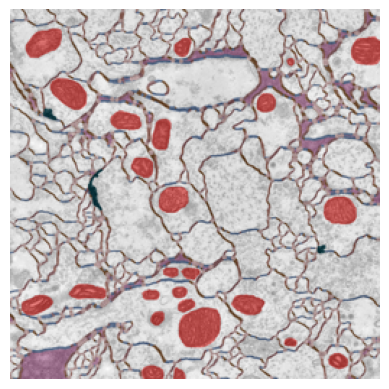

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.axis("off")
plt.show()

## Loading a Pre-Trained Neural Network

Import the VGG16 model, a pre-trained neural network known for its proficiency in image recognition tasks ...

In [ ]:
from torchvision.models import vgg16, VGG16_Weights

model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
model.eval()
model.requires_grad_(False)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

... and print it.

In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Define some variables with the mean and standard deviation values specific to the ImageNet dataset’s color channels.

In [ ]:
import numpy as np
import torch

mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
std = np.array([0.229, 0.224, 0.225], dtype=np.float32)

low = torch.tensor((- mean / std).reshape(1, -1, 1, 1))
high = torch.tensor(((1 - mean) / std).reshape(1, -1, 1, 1))

## Implementing the DeepDream Algorithm

The DeepDream algorithm is designed to optimize an image's representation by performing loss maximization using gradient ascent. By iterating over the image data and adjusting it in the direction that increases the activation of certain layers within a pretrained neural network, this function effectively "dreams up" new visual patterns and textures that amplify the features those layers detect. The process involves normalizing the image data (VGG16 is pretrained on the ImageNet dataset and the inputs are normalized wih respect to the mean and standard deviation of the channels of this dataset), applying forward hooks to capture layer activations, calculating the loss, and then updating the image based on the gradients obtained. The result is an altered image that highlights the intricate patterns learned by the neural network.

Define functions to to convert an image to a tensor, and vice versa ...

In [ ]:
import torchvision.transforms as tt

def image_to_tensor(im, mean, std):
    """Convert image to tensor."""
    normalize = tt.Compose([tt.ToTensor(), tt.Normalize(mean, std)])
    return normalize(im).unsqueeze(0).requires_grad_(True) #unsqueeze(0) batch; requires_grad(we need to change the image)

def tensor_to_image(image, mean, std):
    """Convert tensor to image."""
    denormalize = tt.Normalize(mean=- mean / std, std=1 / std)
    im_array = denormalize(image.data.clone().detach().squeeze()).numpy() #detach
    im_array = np.clip(im_array.transpose(1, 2, 0) * 255, 0, 255) #color channel at the end
    im_array = im_array.astype(np.uint8)
    return Image.fromarray(im_array, "RGB")

... convert the image into a PyTorch tensor ...

In [ ]:
im_tensor = image_to_tensor(im, mean, std)

... perform the DeepDream gradient ascent ...

In [ ]:
layer = model.features[1] #second layer
iter_num = 100
eta = 0.1

hookdata = {}

def hook_func(layer, input, output):
    """Hook for activations."""
    hookdata["activations"] = output

for _ in range(iter_num):
    handle = layer.register_forward_hook(hook_func)
    try:
        _ = model(im_tensor)
    except Exception as e:
        print(f"An error occurred during model prediction: {e}")
    finally:
        handle.remove()

    loss = hookdata["activations"].mean() #average of a stack of feature maps; it's not exact loss
    loss.backward() #calculate the gradient

    grad_mean = torch.mean(im_tensor.grad.data)
    grad_std = torch.std(im_tensor.grad.data)
    normalized_grad = (im_tensor.grad.data - grad_mean) / (grad_std + 1e-8) #1e-8 in case grad_std is 0

    im_tensor.data = im_tensor.data + eta * normalized_grad #梯度上升

    im_tensor.grad.zero_() #清零grad

    im_tensor.data.clamp_(low, high)

... convert the PyTorch tensor back to an image ...

In [ ]:
im_deepdream = tensor_to_image(im_tensor, mean, std)

... and plot the resulting DeepDream.

In [ ]:
plt.imshow(im_deepdream)
plt.title("DeepDream for Layer 1")
plt.axis("off")
plt.show()

### Refactoring the DeepDream Code as a Function

Refactor the code to generate a DeepDream as a function ...

In [ ]:
def deepdream(im, layer_index, iter_num=100, eta=0.1):
    """Generate DeepDream."""
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std = np.array([0.229, 0.224, 0.225], dtype=np.float32)

    low = torch.tensor((- mean / std).reshape(1, -1, 1, 1))
    high = torch.tensor(((1 - mean) / std).reshape(1, -1, 1, 1))

    im_tensor = image_to_tensor(im, mean, std)

    hookdata = {}

    def hook_func(layer, input, output):
        """Hook for activations."""
        hookdata["activations"] = output

    layer = model.features[layer_index]
    for _ in range(iter_num):
        handle = layer.register_forward_hook(hook_func)
        try:
            _ = model(im_tensor)
        except Exception as e:
            print(f"An error occurred during model prediction: {e}")
        finally:
            handle.remove()

        loss = hookdata["activations"].mean()
        loss.backward()

        grad_mean = torch.mean(im_tensor.grad.data)
        grad_std = torch.std(im_tensor.grad.data)
        normalized_grad = (im_tensor.grad.data - grad_mean) / (grad_std + 1e-8)

        im_tensor.data = im_tensor.data + eta * normalized_grad

        im_tensor.grad.zero_()

        im_tensor.data.clamp_(low, high)

    im_deepdream = tensor_to_image(im_tensor, mean, std)

    plt.imshow(im_deepdream)
    plt.title(f"DeepDream for Layer {layer_index}")
    plt.axis("off")
    plt.show()

... and verify that it generates the same DeepDream as before.

In [ ]:
deepdream(im, layer_index=1, iter_num=100, eta=0.1)

### Refectoring the DeepDream Function with a Context Manager for the Hook

Implement a class to context-manage the hook to the activation of a layer ...

In [ ]:
class Fwd_Hook():
    """Forward hook."""

    def __init__(self, layer):
        """Initialize forward hook."""
        self.hook = layer.register_forward_hook(self.hook_func)

    def hook_func(self, layer, input, output):
        """Save activations."""
        self.activations = output

    def __enter__(self, *args):
        """Enter context management."""
        return self

    def __exit__(self, *args):
        """Exit context management and remove hook."""
        self.hook.remove()

... use it in the function to generate the DeepDreams ...

In [ ]:
def deepdream(im, layer_index, iter_num=100, eta=0.1):
    """Generate DeepDream."""
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std = np.array([0.229, 0.224, 0.225], dtype=np.float32)

    low = torch.tensor((- mean / std).reshape(1, -1, 1, 1))
    high = torch.tensor(((1 - mean) / std).reshape(1, -1, 1, 1))

    im_tensor = image_to_tensor(im, mean, std)

    #hookdata = {}

    # def hook_func(layer, input, output):
    #     """Hook for activations."""
    #     hookdata["activations"] = output

    layer = model.features[layer_index]
    for _ in range(iter_num):
        with Fwd_Hook(layer) as fh: #entering context manager
            _ = model(im_tensor)

        loss = fh.activations.mean()
        loss.backward()

        grad_mean = torch.mean(im_tensor.grad.data)
        grad_std = torch.std(im_tensor.grad.data)
        normalized_grad = (im_tensor.grad.data - grad_mean) / (grad_std + 1e-8)

        im_tensor.data = im_tensor.data + eta * normalized_grad

        im_tensor.grad.zero_()

        im_tensor.data.clamp_(low, high)

    im_deepdream = tensor_to_image(im_tensor, mean, std)

    plt.imshow(im_deepdream)
    plt.title(f"DeepDream for Layer {layer_index}")
    plt.axis("off")
    plt.show()

... and verify that the resulting DeepDream is still the same.

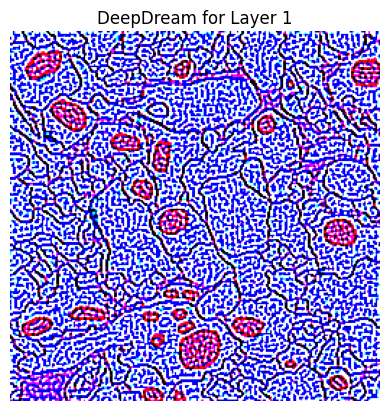

In [ ]:
deepdream(im, layer_index=1, iter_num=100, eta=0.1)

## Generating DeepDreams from Deeper Layers

Call the function to generate DeepDreams on various layers at different depths.

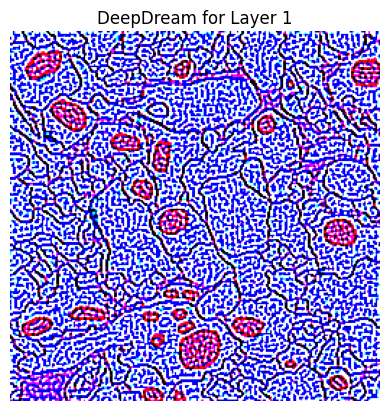

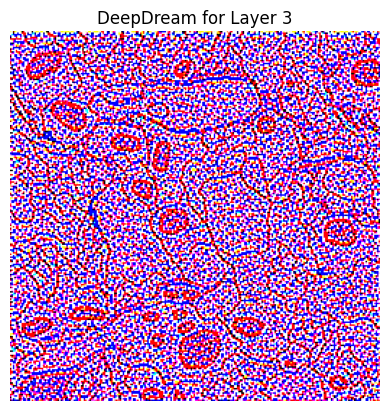

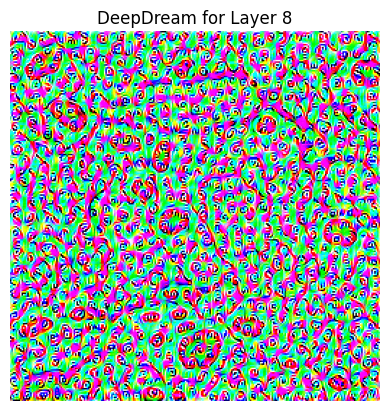

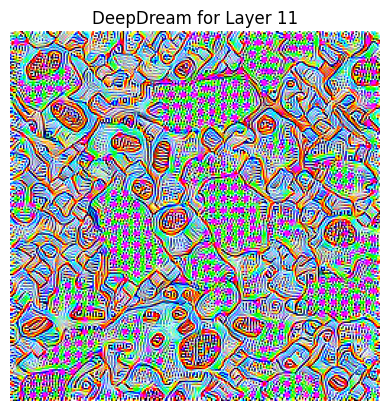

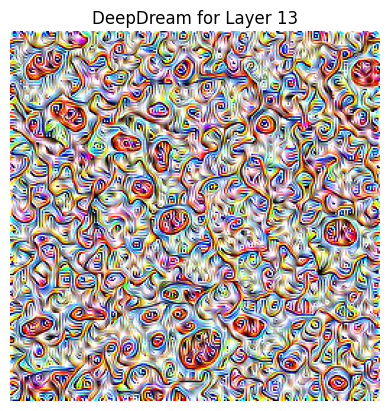

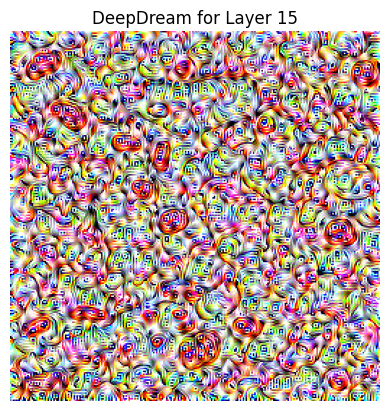

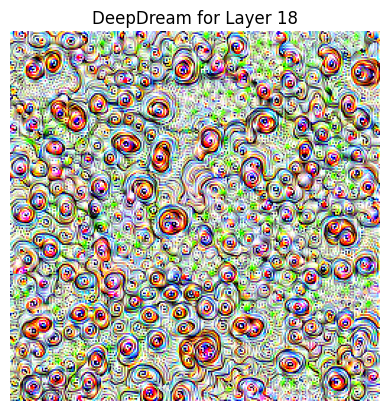

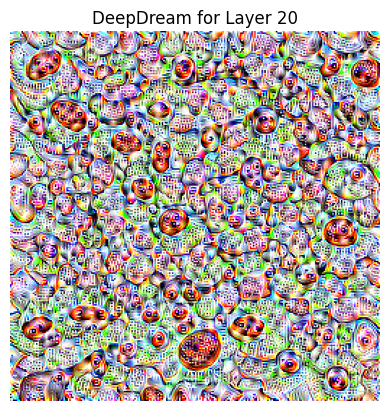

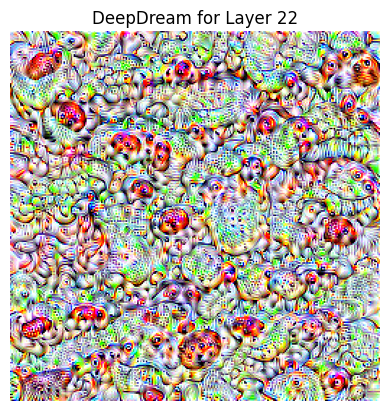

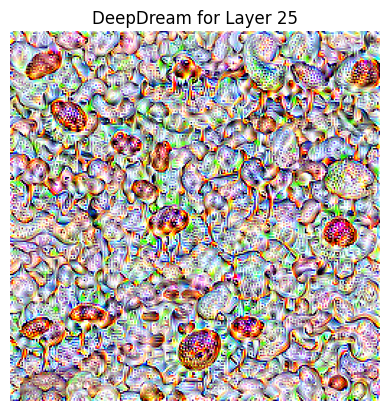

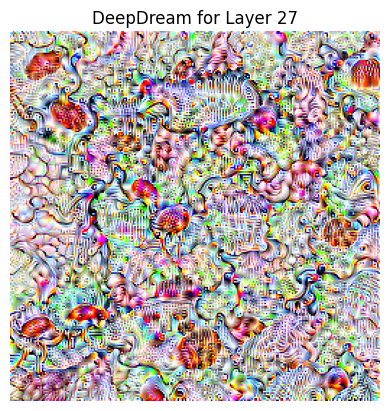

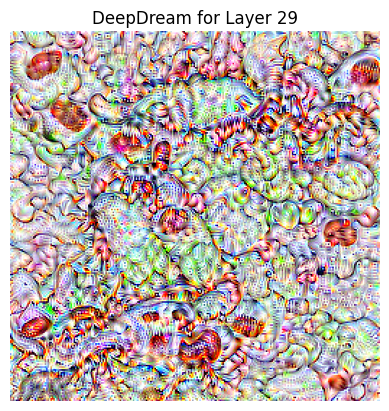

In [ ]:
for layer_index in [1, 3, 6, 8, 11, 13, 15, 18, 20, 22, 25, 27, 29]:
    deepdream(im, layer_index, iter_num=100, eta=0.1)

## Generating DeepDreams from Multiple Layers at Once

Update the context manager to manage hooks to the activations of multiple layers at once ...

In [ ]:
class Fwd_Hooks():
    """Forward hooks."""

    def __init__(self, layers):
        """Initialize forward hooks."""
        self.hooks, self.activations_list = [], []
        for layer in layers:
            self.hooks.append(layer.register_forward_hook(self.hook_func))

    def hook_func(self, layer, input, output):
        """Save activations."""
        self.activations_list.append(output)

    def __enter__(self, *args):
        """Enter context management."""
        return self

    def __exit__(self, *args):
        """Exit context management and remove hooks."""
        for hook in self.hooks:
            hook.remove()

... update the function to generate the DeepDreams to use it ...

In [ ]:
def deepdream(im, layer_indices, iter_num=100, eta=0.1):
    """Generate DeepDream."""
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std = np.array([0.229, 0.224, 0.225], dtype=np.float32)

    low = torch.tensor((- mean / std).reshape(1, -1, 1, 1))
    high = torch.tensor(((1 - mean) / std).reshape(1, -1, 1, 1))

    im_tensor = image_to_tensor(im, mean, std)

    # hookdata = {}

    # def hook_func(layer, input, output):
    #     """Hook for activations."""
    #     hookdata["activations"] = output

    layers = [model.features[layer_index] for layer_index in layer_indices]
    for _ in range(iter_num):
        with Fwd_Hooks(layers) as fh:
            _ = model(im_tensor)

        losses = [activations.mean() for activations in fh.activations_list] # loss for each layer
        loss = torch.stack(losses).sum()
        loss.backward()

        grad_mean = torch.mean(im_tensor.grad.data)
        grad_std = torch.std(im_tensor.grad.data)
        normalized_grad = (im_tensor.grad.data - grad_mean) / (grad_std + 1e-8)

        im_tensor.data = im_tensor.data + eta * normalized_grad

        im_tensor.grad.zero_()

        im_tensor.data.clamp_(low, high)

    im_deepdream = tensor_to_image(im_tensor, mean, std)

    plt.imshow(im_deepdream)
    plt.title(f"DeepDream for Layers {layer_indices}")
    plt.axis("off")
    plt.show()

... and use this update function to calculate the DeepDream from multiple layers.

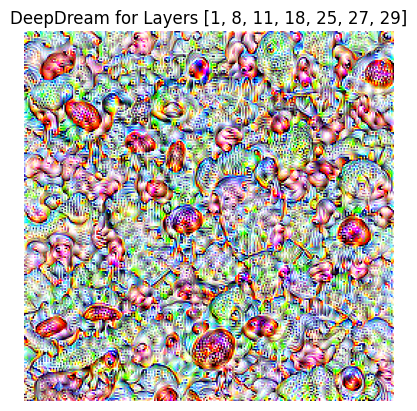

In [ ]:
deepdream(im, layer_indices=[1, 8, 11, 18, 25, 27, 29], iter_num=100, eta=0.1)